In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [2]:
df = pd.read_csv("nick-xword-big.csv")

# Puzzle count by author
df.groupby(['Author'])['PuzTitle'].nunique().sort_values(ascending=False).reset_index()

Author  PuzTitle
0                         Manny Nosowsky       224
1                          Patrick Berry       214
2                    Elizabeth C. Gorski       207
3                          David J. Kahn       167
4                            Rich Norris       159
...                                  ...       ...
1467                      Jeff Armstrong         1
1468  Jeff Chen and Angela Olson Halsted         1
1469       Jeff Slutzky and Derek Bowman         1
1470                     Jenny Gutbezahl         1
1471              joon and caroline pahk         1

[1472 rows x 2 columns]

In [3]:
#Average number of blocks by weekday
df.groupby(['Weekday'])['NumBlocks'].mean().sort_values(ascending=False).reset_index()

Weekday  NumBlocks
0     Sunday  75.364446
1     Monday  37.537245
2  Wednesday  37.485311
3    Tuesday  37.417742
4   Thursday  37.013904
5     Friday  31.464006
6   Saturday  30.743494

In [4]:
# Create BlockDensity column
df['BlockDensity'] = (df['NumBlocks'] / (df['NumRows'] * df['NumCols']))*100

In [5]:
# All BlockDensity values for Monday
df.loc[df['Weekday'] == 'Monday']['BlockDensity']

222       16.000000
223       16.000000
224       16.000000
225       16.000000
226       16.000000
            ...    
801643    18.666667
801644    18.666667
801645    18.666667
801646    18.666667
801647    18.666667
Name: BlockDensity, Length: 106512, dtype: float64

In [6]:
# Get the average BlockDensity by day, and also all individual BlockDensity values for the plot later
data = df.groupby(['Weekday'])['BlockDensity'].agg([np.mean, list]).reset_index()
data

Weekday       mean                                               list
0     Friday  13.969817  [14.222222222222221, 14.222222222222221, 14.22...
1     Monday  16.666676  [16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....
2   Saturday  13.645211  [12.88888888888889, 12.88888888888889, 12.8888...
3     Sunday  16.796030  [17.233560090702948, 17.233560090702948, 17.23...
4   Thursday  16.404469  [17.77777777777778, 17.77777777777778, 17.7777...
5    Tuesday  16.600833  [16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....
6  Wednesday  16.613964  [15.11111111111111, 15.11111111111111, 15.1111...

In [7]:
# Sort by the mean
data.sort_values(by='mean', ascending=False, inplace=True)

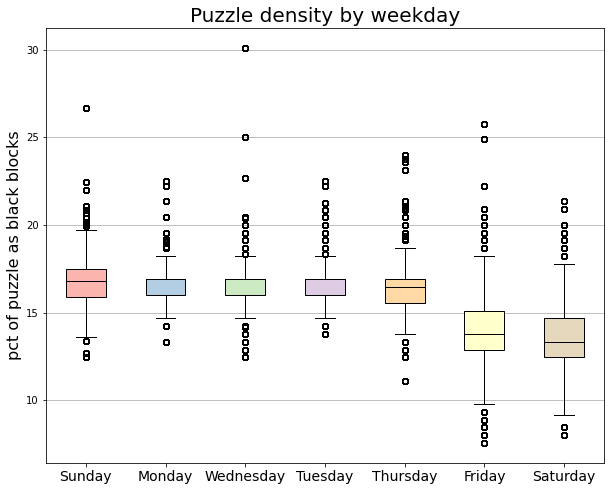

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
bplot = ax.boxplot(data['list'],patch_artist=True, medianprops=dict(color='black'))
ax.set_xticklabels(data['Weekday'].tolist(),fontsize=14)
ax.set_ylabel('pct of puzzle as black blocks',fontsize=16)
ax.set_title('Puzzle density by weekday',fontsize=20)
ax.grid(True,axis='y')

cmap = cm.get_cmap('Pastel1')

for patch, color in zip(bplot['boxes'], cmap.colors):
    patch.set_facecolor(color)
#plt.savefig(fname="density")
plt.show()